In [63]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



In [64]:
filepath = "MyoDataset.csv"
df = pd.read_csv(filepath)

df = df.iloc[:, :9]

In [65]:
X = df.iloc[:,:-1].values  # Entradas (4 columnas)
y = df.iloc[:,-1].values
y = to_categorical(y, num_classes=4)
# Eliminar la primera columna
#y = y[:, 1:]
print(X.shape)  # Debería ser (n_samples, 4)
print(y.shape) 
print(y)


(1989, 8)
(1989, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [66]:
# Identificar las filas en las que y es igual a [0, 0, 0, 0]

#filas_a_eliminar = np.all(y == 0, axis=1)

# Eliminar esas filas de x y y
#X = X[~filas_a_eliminar]
#y = y[~filas_a_eliminar]

#print(X.shape)  # Verifica el nuevo tamaño del arreglo x
#print(y.shape)  # Verifica el nuevo tamaño del arreglo y

In [67]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Crear y ajustar el MinMaxScaler con el rango de Myo (0 a 1023)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([[0] * 8, [1023] * 8]))  # Ajustar los valores extremos

# Normalizar los datos de X
X_normalized = scaler.transform(X)

print("Datos normalizados:")
print(X_normalized)



Datos normalizados:
[[0.03323558 0.03812317 0.08895406 ... 0.13685239 0.18084066 0.05278592]
 [0.03616813 0.04105572 0.08895406 ... 0.1427175  0.18572825 0.05474096]
 [0.03616813 0.03910068 0.07526882 ... 0.14467253 0.19061584 0.05083089]
 ...
 [0.17595308 0.12121212 0.2111437  ... 0.06256109 0.04496579 0.08895406]
 [0.16813294 0.10361681 0.20918866 ... 0.06744868 0.04789834 0.08406647]
 [0.18475073 0.11045943 0.20918866 ... 0.07331378 0.05278592 0.09090909]]


In [68]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Verifica el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (1591, 8)
Tamaño del conjunto de prueba: (398, 8)


In [69]:
# Crear el modelo
model = Sequential()

# Capa de entrada (4 entradas) + Capa oculta
model.add(Dense(518, input_dim=8, activation='relu'))  # 64 neuronas en la capa oculta
model.add(Dense(256, activation='relu'))              # Capa oculta adicional

# Capa de salida (4 neuronas para cada clase, usando softmax)
model.add(Dense(4, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',  # Usamos 'categorical_crossentropy' para clasificación multi-clase
              optimizer='adam',                # Optimizador Adam
              metrics=['accuracy'])           # Métrica de precisión

# Resumen del modelo
model.summary()

c:\Users\winte\anaconda3\envs\my_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 518)            │         4,662 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       132,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,554 (541.23 KB)

 Trainable params: 138,554 (541.23 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1591, 8) (1591, 4)
(398, 8) (398, 4)


In [71]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy*100:.2f}%")

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7183 - loss: 1.1192 - val_accuracy: 0.9925 - val_loss: 0.3210
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.2153 - val_accuracy: 0.9975 - val_loss: 0.0622
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9982 - loss: 0.0478 - val_accuracy: 0.9950 - val_loss: 0.0332
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0283 - val_accuracy: 0.9975 - val_loss: 0.0264
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9993 - loss: 0.0218 - val_accuracy: 0.9975 - val_loss: 0.0190
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 0.0130 - val_accuracy: 0.9975 - val_loss: 0.0116
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9990 - loss: 0.0088 - val_accuracy: 0.9975 - val_loss: 0.0119
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9978 - loss: 0.0106 - val_accuracy: 0.9975 - val_loss:

In [72]:
# Hacer una predicción con datos de entrada nuevos
predictions = model.predict(X_test)

# Convertir las predicciones de vuelta a la clase (el índice con la mayor probabilidad)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[2 3 1 0 1 1 3 3 3 2 0 2 2 1 0 1 1 3 1 0 2 0 3 3 3 0 0 2 3 2 2 0 2 0 2 1 2
 0 2 3 3 2 2 3 3 0 2 3 3 2 0 3 2 1 2 0 3 0 2 1 3 1 2 2 3 0 2 2 3 2 2 1 0 0
 0 1 1 3 2 1 0 1 1 1 1 0 3 2 1 2 1 3 3 1 2 3 0 3 0 3 3 1 2 0 2 0 1 3 0 1 1
 1 2 2 2 2 0 1 2 3 3 0 3 0 0 1 2 2 1 3 3 1 1 2 2 0 0 3 3 0 1 1 2 3 0 2 3 1
 3 3 0 1 2 0 3 0 3 0 2 2 1 3 1 2 1 2 2 2 1 3 2 2 0 1 0 1 1 0 3 3 3 3 0 0 1
 1 2 0 2 0 2 3 3 3 2 3 0 1 1 0 1 1 0 0 0 1 0 2 1 2 0 0 1 2 0 3 0 2 0 2 0 3
 1 3 0 2 2 2 3 3 1 3 0 2 0 3 2 1 0 3 1 3 1 0 3 3 3 3 3 3 0 2 0 0 1 2 3 0 3
 0 0 0 1 3 0 0 1 1 2 3 3 3 1 1 3 0 3 1 3 0 3 0 3 0 0 0 2 2 1 2 1 3 0 1 2 3
 2 0 3 2 1 1 1 0 1 0 2 0 3 1 2 1 3 3 0 3 0 1 0 0 2 0 3 2 1 0 0 1 1 3 1 3 2
 0 3 0 2 2 0 2 3 3 1 3 2 2 0 1 2 3 0 0 3 1 2 3 0 0 1 0 1 0 3 0 3 0 3 2 0 1
 1 1 2 3 2 3 2 1 1 3 1 2 0 2 1 3 3 3 2 1 1 3 3 1 0 1 3 0]


In [73]:
# Evaluar en el conjunto de testeo
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Pérdida en el conjunto de testeo: {test_loss:.4f}")
print(f"Precisión en el conjunto de testeo: {test_accuracy:.4f}")


13/13 - 0s - 9ms/step - accuracy: 0.9950 - loss: 0.0149
Pérdida en el conjunto de testeo: 0.0149
Precisión en el conjunto de testeo: 0.9950


In [74]:
# Generar predicciones
predicciones = model.predict(X_test)

# Si es clasificación, convertir las probabilidades a etiquetas
y_pred = np.argmax(predicciones, axis=1)
# Comparar con las etiquetas reales
print("Etiquetas reales:", y_test)
print("Predicciones:", y_pred)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Etiquetas reales: [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
Predicciones: [2 3 1 0 1 1 3 3 3 2 0 2 2 1 0 1 1 3 1 0 2 0 3 3 3 0 0 2 3 2 2 0 2 0 2 1 2
 0 2 3 3 2 2 3 3 0 2 3 3 2 0 3 2 1 2 0 3 0 2 1 3 1 2 2 3 0 2 2 3 2 2 1 0 0
 0 1 1 3 2 1 0 1 1 1 1 0 3 2 1 2 1 3 3 1 2 3 0 3 0 3 3 1 2 0 2 0 1 3 0 1 1
 1 2 2 2 2 0 1 2 3 3 0 3 0 0 1 2 2 1 3 3 1 1 2 2 0 0 3 3 0 1 1 2 3 0 2 3 1
 3 3 0 1 2 0 3 0 3 0 2 2 1 3 1 2 1 2 2 2 1 3 2 2 0 1 0 1 1 0 3 3 3 3 0 0 1
 1 2 0 2 0 2 3 3 3 2 3 0 1 1 0 1 1 0 0 0 1 0 2 1 2 0 0 1 2 0 3 0 2 0 2 0 3
 1 3 0 2 2 2 3 3 1 3 0 2 0 3 2 1 0 3 1 3 1 0 3 3 3 3 3 3 0 2 0 0 1 2 3 0 3
 0 0 0 1 3 0 0 1 1 2 3 3 3 1 1 3 0 3 1 3 0 3 0 3 0 0 0 2 2 1 2 1 3 0 1 2 3
 2 0 3 2 1 1 1 0 1 0 2 0 3 1 2 1 3 3 0 3 0 1 0 0 2 0 3 2 1 0 0 1 1 3 1 3 2
 0 3 0 2 2 0 2 3 3 1 3 2 2 0 1 2 3 0 0 3 1 2 3 0 0 1 0 1 0 3 0 3 0 3 2 0 1
 1 1 2 3 2 3 2 1 1 3 1 2 0 2 1 3 3 3 2 1 1 3 3 1 0 1 3 0]


In [75]:



# Predicciones
y_pred = np.argmax(model.predict(X_test), axis=1)
print(y_pred)  # Debería ser (n_samples, 4)
y_test=np.argmax(y_test, axis=1)
print(y_test)


# Reporte y matriz de confusión
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
cm=confusion_matrix(y_test, y_pred)



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[2 3 1 0 1 1 3 3 3 2 0 2 2 1 0 1 1 3 1 0 2 0 3 3 3 0 0 2 3 2 2 0 2 0 2 1 2
 0 2 3 3 2 2 3 3 0 2 3 3 2 0 3 2 1 2 0 3 0 2 1 3 1 2 2 3 0 2 2 3 2 2 1 0 0
 0 1 1 3 2 1 0 1 1 1 1 0 3 2 1 2 1 3 3 1 2 3 0 3 0 3 3 1 2 0 2 0 1 3 0 1 1
 1 2 2 2 2 0 1 2 3 3 0 3 0 0 1 2 2 1 3 3 1 1 2 2 0 0 3 3 0 1 1 2 3 0 2 3 1
 3 3 0 1 2 0 3 0 3 0 2 2 1 3 1 2 1 2 2 2 1 3 2 2 0 1 0 1 1 0 3 3 3 3 0 0 1
 1 2 0 2 0 2 3 3 3 2 3 0 1 1 0 1 1 0 0 0 1 0 2 1 2 0 0 1 2 0 3 0 2 0 2 0 3
 1 3 0 2 2 2 3 3 1 3 0 2 0 3 2 1 0 3 1 3 1 0 3 3 3 3 3 3 0 2 0 0 1 2 3 0 3
 0 0 0 1 3 0 0 1 1 2 3 3 3 1 1 3 0 3 1 3 0 3 0 3 0 0 0 2 2 1 2 1 3 0 1 2 3
 2 0 3 2 1 1 1 0 1 0 2 0 3 1 2 1 3 3 0 3 0 1 0 0 2 0 3 2 1 0 0 1 1 3 1 3 2
 0 3 0 2 2 0 2 3 3 1 3 2 2 0 1 2 3 0 0 3 1 2 3 0 0 1 0 1 0 3 0 3 0 3 2 0 1
 1 1 2 3 2 3 2 1 1 3 1 2 0 2 1 3 3 3 2 1 1 3 3 1 0 1 3 0]
[2 3 1 0 1 1 3 3 3 2 0 2 2 1 0 1 1 3 1 0 2 0 3 3 3 0 0 2 3 2 2 0 2 0 2 1 2
 0 2 3 3 2 2 3 3 0 2 3 3 2 0 3 2 1 2 0 3 0 2 1 3 1 2 2 3 0 2 2 3 2 2 1 0 0
 0

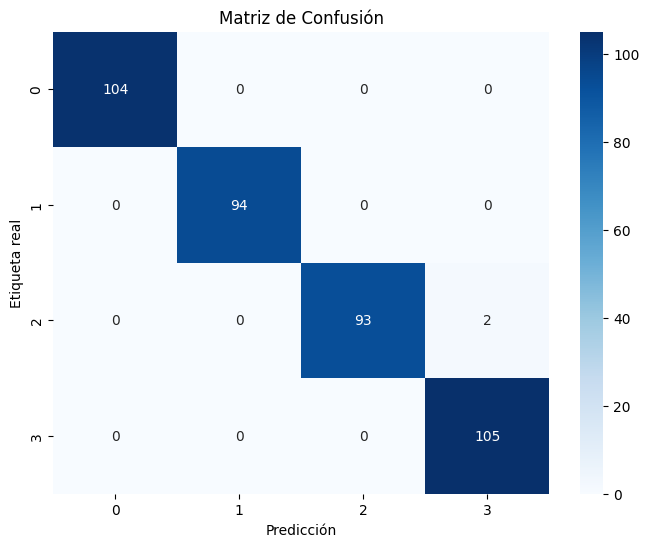

In [76]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()


In [77]:
# Guardar el modelo completo en un archivo H5
model.save('modelo_completo.keras')

# Guardar solo los pesos
model.save_weights('model_weights.weights.h5')
